In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 0)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data_path = r'C:\Users\DucTRung\Desktop\data_set\airbnb_singapore'

In [3]:
df = pd.read_csv(data_path+'\\listings.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


### Data Description
[data source](https://www.kaggle.com/jojoker/singapore-airbnb)
* 7907 samples with 16 indexes.
* price: singapore dollar per night.
* calculated_host_listings_count: total room or house in host catalog on Airbnb.

## Data Cleaning

### Exploring the descriptive statistics of the variables

In [5]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7905,7.907000e+03,7907,7907,7907,7907.000000,7907.000000,7907,7907.000000,7907.000000,7907.000000,5149,5149.000000,7907.000000,7907.000000
unique,NaN,7457,NaN,1833,5,43,NaN,NaN,3,NaN,NaN,NaN,1001,NaN,NaN,NaN
top,NaN,Luxury hostel with in-cabin locker - Single mixed,NaN,Jay,Central Region,Kallang,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-08-12,NaN,NaN,NaN
freq,NaN,13,NaN,290,6309,1043,NaN,NaN,4132,NaN,NaN,NaN,152,NaN,NaN,NaN
mean,2.338862e+07,NaN,9.114481e+07,NaN,NaN,NaN,1.314192,103.848787,NaN,169.332996,17.510054,12.807386,NaN,1.043669,40.607689,208.726318
std,1.016416e+07,NaN,8.190910e+07,NaN,NaN,NaN,0.030577,0.043675,NaN,340.187599,42.094616,29.707746,NaN,1.285851,65.135253,146.120034
min,4.909100e+04,NaN,2.366600e+04,NaN,NaN,NaN,1.243870,103.646560,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,1.582180e+07,NaN,2.305808e+07,NaN,NaN,NaN,1.295795,103.835825,NaN,65.000000,1.000000,0.000000,NaN,0.180000,2.000000,54.000000
50%,2.470627e+07,NaN,6.344891e+07,NaN,NaN,NaN,1.311030,103.849410,NaN,124.000000,3.000000,2.000000,NaN,0.550000,9.000000,260.000000
75%,3.234850e+07,NaN,1.553811e+08,NaN,NaN,NaN,1.322110,103.872535,NaN,199.000000,10.000000,10.000000,NaN,1.370000,48.000000,355.000000


### Determing the variables of interest

In [6]:
df.columns.values

array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

In [7]:
cols = ['price', 'neighbourhood_group',
       'neighbourhood', 'room_type', 
       'minimum_nights', 'number_of_reviews',
       'availability_365']

In [8]:
df_2 = df[cols]

In [9]:
df_2.describe(include='all')

,price,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,availability_365
count,7907.000000,7907,7907,7907,7907.000000,7907.000000,7907.000000
unique,NaN,5,43,3,NaN,NaN,NaN
top,NaN,Central Region,Kallang,Entire home/apt,NaN,NaN,NaN
freq,NaN,6309,1043,4132,NaN,NaN,NaN
mean,169.332996,NaN,NaN,NaN,17.510054,12.807386,208.726318
std,340.187599,NaN,NaN,NaN,42.094616,29.707746,146.120034
min,0.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000
25%,65.000000,NaN,NaN,NaN,1.000000,0.000000,54.000000
50%,124.000000,NaN,NaN,NaN,3.000000,2.000000,260.000000
75%,199.000000,NaN,NaN,NaN,10.000000,10.000000,355.000000


### Dealing with missing values

In [10]:
df_2.isnull().sum()

price                  0
neighbourhood_group    0
neighbourhood          0
room_type              0
minimum_nights         0
number_of_reviews      0
availability_365       0
dtype: int64

### Exploring the PDFs

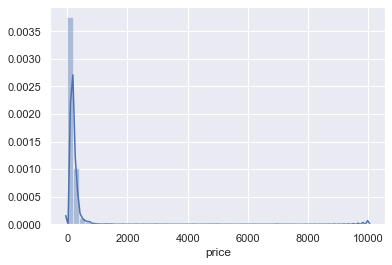

In [11]:
# PRICE
sns.distplot(df_2['price'])

In [12]:
q = df_2['price'].quantile(.95) # Get 95% of data set
data_1 = df_2[df_2['price'] < q]

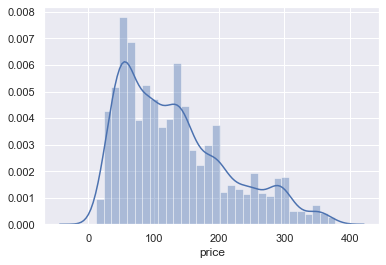

In [13]:
sns.distplot(data_1['price'])

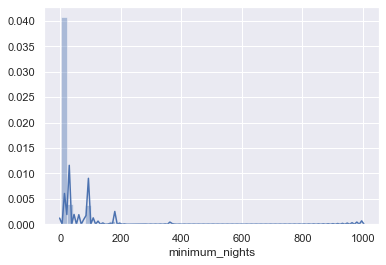

In [14]:
# MINIMUM_NIGHTS
sns.distplot(data_1['minimum_nights'])

In [15]:
q = data_1['minimum_nights'].quantile(.95)
data_2 = data_1[data_1['minimum_nights'] < q]

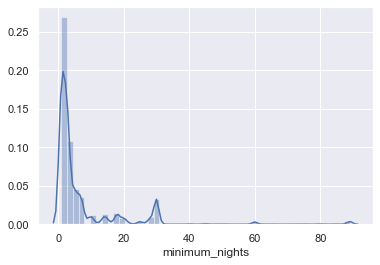

In [16]:
sns.distplot(data_2['minimum_nights'])

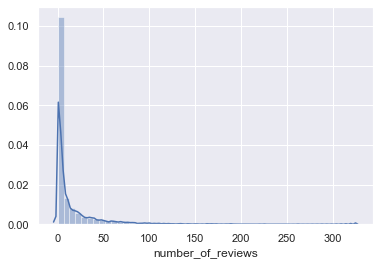

In [17]:
# NUMBER OF REVIEWS
sns.distplot(data_2['number_of_reviews'])

In [18]:
q = data_2['number_of_reviews'].quantile(.95)
data_3 = data_2[data_2['number_of_reviews'] < q]

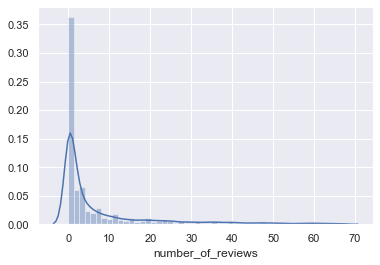

In [19]:
sns.distplot(data_3['number_of_reviews'])

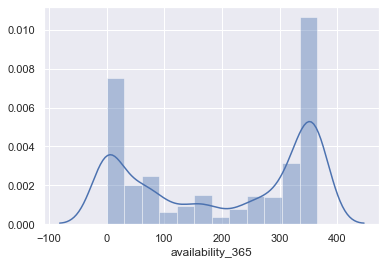

In [20]:
# AVAIBABILITY
sns.distplot(data_3['availability_365'])

In [21]:
data_4 = data_3[data_3['availability_365'] > 0]

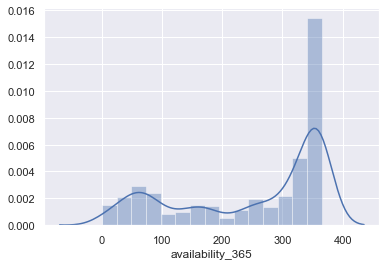

In [22]:
sns.distplot(data_4['availability_365'])

In [23]:
cleansed_df = data_4.reset_index()

## Relax Assumptions

### Linearity

In [24]:
cleansed_df

,index,price,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,availability_365
0,2,69,North Region,Woodlands,Private room,6,20,365
1,3,206,East Region,Tampines,Private room,1,14,353
2,4,94,East Region,Tampines,Private room,1,22,355
3,5,104,East Region,Tampines,Private room,1,39,346
4,6,208,East Region,Tampines,Private room,1,25,172
...,...,...,...,...,...,...,...,...
5199,7900,90,West Region,Bukit Batok,Private room,3,0,83
5200,7901,100,Central Region,Queenstown,Entire home/apt,3,0,61
5201,7902,100,Central Region,Queenstown,Entire home/apt,3,0,61
5202,7904,58,Central Region,Kallang,Private room,30,0,173


Text(0.5, 1.0, 'Price and availability_365')

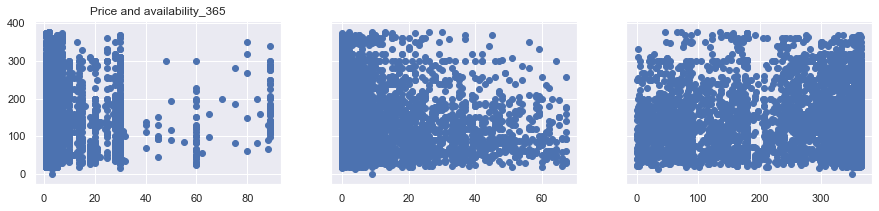

In [25]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 3))

axes[0].scatter(cleansed_df['minimum_nights'], cleansed_df['price'])
axes[0].set_title('Price and minimum nights')
axes[1].scatter(cleansed_df['number_of_reviews'], cleansed_df['price'])
axes[0].set_title('Price and number of reviews')
axes[2].scatter(cleansed_df['availability_365'], cleansed_df['price'])
axes[0].set_title('Price and availability_365')

In [26]:
# Apply 'log_transform'
cleansed_df['log_price'] = np.log(cleansed_df['price'])
cleansed_df['log_min_nights'] = np.log(cleansed_df['minimum_nights'])
cleansed_df['log_reviews'] = np.log(cleansed_df['number_of_reviews'])
cleansed_df['log_avai'] = np.log(cleansed_df['availability_365'])

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Price and availability_365')

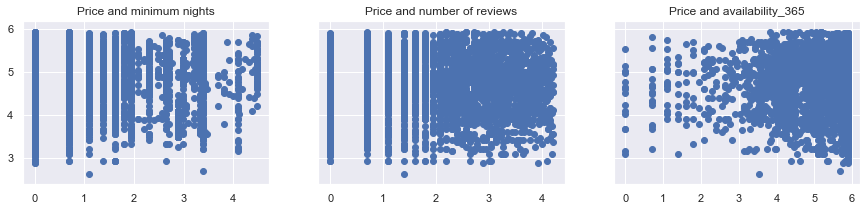

In [27]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 3))

axes[0].scatter(cleansed_df['log_min_nights'], cleansed_df['log_price'])
axes[0].set_title('Price and minimum nights')
axes[1].scatter(cleansed_df['log_reviews'], cleansed_df['log_price'])
axes[1].set_title('Price and number of reviews')
axes[2].scatter(cleansed_df['log_avai'], cleansed_df['log_price'])
axes[2].set_title('Price and availability_365')

### Three numberical don't have linearity relationship with 'Price'

In [28]:
cols = ['log_price', 'neighbourhood_group', 'neighbourhood', 'room_type']
data_assumptions = cleansed_df[cols]

## Create Dummy Variables

In [29]:
data_assumptions

,log_price,neighbourhood_group,neighbourhood,room_type
0,4.234107,North Region,Woodlands,Private room
1,5.327876,East Region,Tampines,Private room
2,4.543295,East Region,Tampines,Private room
3,4.644391,East Region,Tampines,Private room
4,5.337538,East Region,Tampines,Private room
...,...,...,...,...
5199,4.499810,West Region,Bukit Batok,Private room
5200,4.605170,Central Region,Queenstown,Entire home/apt
5201,4.605170,Central Region,Queenstown,Entire home/apt
5202,4.060443,Central Region,Kallang,Private room


In [30]:
data_set = pd.get_dummies(data_assumptions)

## Linear Regression

In [31]:
# Target vector
y = data_set['log_price']

In [32]:
# Feature matrix
X = data_set.drop(columns=['log_price'])

### Standardization

In [33]:
# Standardiztion
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaler.transform(X)

array([[-2.21062838, -0.23529561,  6.37432349, ..., -1.1328979 ,
         1.28650769, -0.25554245],
       [-2.21062838,  4.24997307, -0.15687939, ..., -1.1328979 ,
         1.28650769, -0.25554245],
       [-2.21062838,  4.24997307, -0.15687939, ..., -1.1328979 ,
         1.28650769, -0.25554245],
       ...,
       [ 0.45236007, -0.23529561, -0.15687939, ...,  0.88269207,
        -0.77729811, -0.25554245],
       [ 0.45236007, -0.23529561, -0.15687939, ..., -1.1328979 ,
         1.28650769, -0.25554245],
       [ 0.45236007, -0.23529561, -0.15687939, ..., -1.1328979 ,
         1.28650769, -0.25554245]])

### Splitting train and test set

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)

### Create model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
reg_mol = LinearRegression()

In [44]:
reg_mol.fit(X_train, round(y_train,3))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Evaluation

In [ ]:
# R-squared
reg_mol.score(X_train, y_train)

In [ ]:
y_pred = reg_mol.predict(X_test)

In [ ]:
# Checking linearityy
plt.scatter(y_test, y_pred)
plt.ylim(0, 300)

In [ ]:
# Checking residuals
sns.distplot(y_train - y_pred)

## Bias and Weights

In [ ]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg_mol.coef_
reg_summary